<a href="https://colab.research.google.com/github/orizay/free-fonts/blob/master/03_%EA%B3%A0%EA%B0%9D%EC%9D%98_%EC%A0%84%EC%B2%B4_%EB%AA%A8%EC%8A%B5%EC%9D%84_%ED%8C%8C%EC%95%85%ED%95%98%EB%8A%94_%ED%85%8C%ED%81%AC%EB%8B%89_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 분석의 묘미는 현재 데이터를 가지고 미래를 예측하는 것입니다.다시 말해, 현황을 분석해서 문제점을 파악하고 더 좋은 미래로 바꾸기 위한 최적의 정책을 실시할 수 있게 하는 것입니다.
- 

# 고객의 전체 모습을 파악하는 테크닉 10
- 테크닉 21_데이터를 읽어서 파악하자
- 테크닉 22_고객 데이터를 가공하자
- 테크닉 23_고객 데이터를 집계하자
- 테크닉 24_최신 고객 데이터를 집계하자
- 테크닉 25_이용 이력 데이터를 집계하자
- 테크닉 26_이용 이력 데이터로부터 정기 이용 플래그를 작성하자
- 테크닉 27_고객 데이터와 이용 이력 데이터를 결합하자
- 테크닉 28_회원 기간을 계산하자
- 테크닉 29_고객 행동의 각종 통계량을 파악하자
- 테크닉 30_탈퇴 회원과 지속 회원의 차이를 파악하자

# 전제조건
- 스포츠 선테에는 센터를 언제든 사용할 수 있는 종일 회원, 낮에만 사용할 수 있는 주간회원, 밤에만 사용할수 있는 야간회원으로 3종류의 회원 구분이 있습니다.
- 일반적으로 입회비가 들지만, 비정기적으로 입회비 반액 할인이나 입회비 무료 행사를 해서 신규회원을 늘이고있습니다.
- 탈퇴하려면 월말까지 신청하면 그 다을달 말에 탈퇴가 됩니다.
- ues_log.csv: 센터의 이력 데이터, 기간은 2018년 4월~ 2019년 3월
- customer_master.csv: 2019년 3월 말 시점의 회원 데이터
- class_master: 회원 구분 데이터(종일,주간,야간)
- campaign_master: 행사 구분 데이터(입회비 유무 등)

# **021/ 데이터를 읽어 들이고 확인하자**

In [1]:
import pandas as pd

In [2]:
!git clone https://github.com/wikibook/pyda100

Cloning into 'pyda100'...
remote: Enumerating objects: 527, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 527 (delta 13), reused 19 (delta 8), pack-reused 489
Receiving objects: 100% (527/527), 477.16 MiB | 26.49 MiB/s, done.
Resolving deltas: 100% (27/27), done.
Checking out files: 100% (476/476), done.


In [3]:
uselog = pd.read_csv('/content/pyda100/3장/use_log.csv')
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [4]:
customer = pd.read_csv('/content/pyda100/3장/customer_master.csv')
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [5]:
class_master = pd.read_csv('/content/pyda100/3장/class_master.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [6]:
campaign_master = pd.read_csv('/content/pyda100/3장/campaign_master.csv')
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


### 데이터를 읽어 들인 결과
- 1부에서도 언급했지만, 처음에는 처음 몇 행을 표시해서 어떤 데이터열이 존재하는지, 각 데이터의 관계성과 같은 데이터의 큰 틀을 파악하는 것이 중요합니다.
  - 그리고 데이터의 개수를 파악하기 위해서 len()을 사용해서 표시했습니다.
- 이용 이력 use_log.csv를 저장한 uselog는 고객 ID, 이용일을 포함한 간단한 데이터라는 것을 알수 있습니다.
  - 이것은 어떤 고객이 언제 센터를 이용했는지를 알 수 있는 데이터입니다.데이터는 197,428건으로 세로로 긴 데이터 입니다.

- 회원 데이터 customer_master.csv를 저장한 customer에는 고객 ID, 이름, 회원 클래스, 성별, 등록일 정보가 들어 있습니다
  - 이름은 마스킹돼 있어서 이름만으로 개인을 특정 지을 수 없게 돼 있습니다. 
  - is_deleted 열은 2019년3월 시점에 탈퇴한 유저를 시스템에서 빨리 찾기 위한 칼럼입니다.
  - 살펴보면 customer_id로 두 데이터를 연결시킬 수 있다는 것을 알수 있습니다.
  - 회원 데이터의 데이터 수는 이미 탈퇴한 유저도 포함되여 있으며 4,192명아라는 것을 알 수 있습니다.
- 회원 구분, 캠페인 구분 데이터는 각각 구분할 수 있는 내용이 데이터에 포함되어 있으며, 각각 class와 campaign_id를 이용하면 회원 데이터와 연결할 수 있음을 알 수 있습니다.

# **022/ 고객 데이터를 가공하자**

### 여기서는 고객 데이터를 가공합니다.
- 테크닉 21에서 불러온 customer에 회원 구분 class_master와 캠페인 구분 campaign_master를 결합해서 customer_join을 새로 생성합니다.
  - 고객 데이터를 중심으로 가로로 결합하는 레프트 조인입니다.
  - 조인키는 각자 찾아봅니다.
  - 조인전후에 데이터 개수가 변하지 않는 것도 확인합시다.

In [7]:
customer_join = pd.merge(customer, class_master, on='class', how='left')
customer_join = pd.merge(customer_join, campaign_master, on='campaign_id', how='left')
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


### 데이터 유니언
- 1행에서 회원 구분 데이터 class_master를 결합하고 2행에서 캠페인 구분 campaign_master를 결합니다.
- 결합후 처음 5행의 출력 결과를 보면, class_name, price, campaign_name 칼럼이 추가 되어 회원 구분과 금액을 알 수 있게 데이터가 가공됐으며, 데이터 개수도 조인 전후로 변화가 없는 것을 확인 할 수 있습니다.
- 조인할 때 키가 없거나 조인이 잘못되면 자동으로 결측치가 들어갑니다.
  - 그래서 조인 후에는 결측치를 확인해야 합니다.

In [8]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

### 결측치 확인 
- end_date 외에는 결측치가 0으로, 이번 조인에서 추가한 class_name, price, campaign_name에는 데이터가 정확하게 들어 있는 것을 확인했습니다.
- end_date에 결측치가 포함된 것이외에는 비교적 깨끗한 데이터인 것을 알 수 있습니다.

 - *end_date에 결측이 있는 이유는 탈퇴하지 않은 회원의 탈퇴일이 공백이기 때문이라고 생각할 수 있습니다.

# **023/ 고객 데이터를 집계하자**

### 데이터 가공을 완료했으니 고객 데이터를 집계해서 전체 모습을 살펴봅니다
- 집계 항목을 생각해 봅니다.
  - 어떤 회원과 어떤 캠페인이 많으니, 언제 입회/탈퇴가 많은지,
  - 남녀 비율은 얼마인지, 탈퇴할 때까지의 기간은 어느 정도인지 등 많은 것을 집계할 수 있습니다.
  - 우선 캠페인 구분과 성별,이미 탈퇴를 했는지 안 했는지(is_deleted 열)를 집계해서 전체 숫자를 파악해 봅니다.

In [9]:
customer_join.groupby('class_name').count()['customer_id']

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

In [10]:
customer_join.groupby('campaign_name').count()['customer_id']

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64

In [11]:
customer_join.groupby('gender').count()['customer_id']

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [12]:
customer_join.groupby('is_deleted').count()['customer_id']

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

### 고객 데이터 집계
- 1부에서도 사용한 groupby를 이용해서 집계합니다.이번에는 customer_id로 카운트합니다.
- 회원 클래스는 종일반이 거의 절반을 차지하고 야간 다음,주간 순입니다.
- 캠페인은 일반 입회가 많고, 입회 캠페인에 의한 가입이 약 20%입니다.
  - 남녀 비율은 남자(M)쪽이 약간 많다는 것을 알수 있습니다.
  - 마지막으로 2019년 3월 현재 가입된 회원은 2842명이고 탈퇴한 유저는 1350명인 것을 알 수 있습니다.
- 이렇게 살펴보면 여러 가지 가설이나 캠페인이 시행된 시기나 성별과 회원 클래스의 관계, 올해 가입 인원처럼 궁금한 점이 생길 것이라 생각합니다.
- 이런 가설이나 의문점은 집계해서 확인하는 것뿐만 아니라, 현장 사람들에게 질물함으로써 이해할 수 있는 것이 많습니다.적극적으로 의견을 청취하는 것이 좋습니다.
- 여기서 start_date가 2018년 4월1일 이후부터 2019년 3월 31일 까지인 가입 인원을 시험삼아 집계해 봅시다
  - 1부에서 사용한 것처럼 먼저 start_date를 datetime형으로 변환한 후, customer_start 변수에 해당 유저의 데이터를 저장하고 개수를 세어봅니다.


In [13]:
customer_join['start_date'] = pd.to_datetime(customer_join['start_date'])
customer_start = customer_join.loc[customer_join['start_date'] > 
                 pd.to_datetime('20180401')]
print(len(customer_start))

1361


# **024/ 최신 고객 데이터를 집계하자**

### 최근 월(2019년 3월)의 고객 데이터를 파악해 봅니다.
- 현재 고객 데이터에는 이미 탈회한 고객도 포함되어 있개 때문에 월별 집계와는 차이가 있습니다.
  - 여기서는 가장 최근 월의 데이터를 집계해서 현재 고객의 전체 모습을 파악합니다.
- 최근 월로 추출하기 위해서는 1. 2019년 3월(2019년 3월 31일)에 탈퇴한 고개과 재적 중인 고객을 추출하거나 2. is_deleted 열로 추출하는 방법이 있습니다. 2의 경우에는 2019년 3월에 탈퇴한 고객은 카운트되지 않기 때문에 주의해야 합니다.
  - 목적에 따라 달라지지만, 이번에는 최근 월에 재적 중인 회원이므로 1이 방법을 이용하겠습니다.


In [14]:
customer_join['end_date'] = pd.to_datetime(customer_join['end_date'])
customer_newer = customer_join.loc[(customer_join['end_date'] > 
            pd.to_datetime('20190331')) | (customer_join['end_date'].isna())]
print(len(customer_newer))
customer_newer['end_date'].unique()

2842


array(['NaT'], dtype='datetime64[ns]')

### 출력한 결과, 데이터는 2,953건이고, end_date의 유니크는 NaT로, 2019-03-31만 표시된다면 올바르게 추출된 것입니다. NaT는 datetime형의 결측치라는 의미로, 여기서는 탈퇴하지않은 고객을 나타냅니다.

In [15]:
customer_newer.groupby('class_name').count()['customer_id']

class_name
0_종일    1381
1_주간     675
2_야간     786
Name: customer_id, dtype: int64

In [16]:
customer_newer.groupby('campaign_name').count()['customer_id']

campaign_name
0_입회비반액할인     282
1_입회비무료       219
2_일반         2341
Name: customer_id, dtype: int64

In [17]:
customer_newer.groupby('gender').count()['customer_id']

gender
F    1352
M    1490
Name: customer_id, dtype: int64

### 최근 월 고개 집계 결과
- 출력 결과를 보면, 회원 구분 및 성별은 테크닉 23에서 전체를 집계했을 때와 비율이 크게 다르지 않습니다.
- 이것은 특정 회원 구분이나 성별이 탈퇴한 것이 아니라고 생각할 수 있습니다.
- 캠페인 구분은 약간 차이가 있어, 전체를 집계했을 때는 일반으로 입회한 유저가 72%였던 것에 반해,일반 입회 회원 비율이 81%입니다.
- 입회 캠페인은 회원 비율 변화에 영향을 미친다고 추측할 수 있습니다(%는 각자 계산해 보세요)
- 회원이난 성별 구분은 큰 변화가 없습니다.

# **025/ 이용 이력 데이터를 집계하자**

### 먼저, 간단히 시간적인 요소를 도입해 봅시다.이번에는 월 이용 횟수의 평균값, 중앙값, 최대값, 최솟값과 정기적 이용 여부를 플래그로 작성해서 고객 데이터에 추가합니다.

In [18]:
uselog['usedate'] = pd.to_datetime(uselog['usedate'])
uselog['연월'] = uselog['usedate'].dt.strftime('%Y%m')
uselog_months = uselog.groupby(['연월', 'customer_id'], as_index=False).count()
uselog_months.rename(columns={'log_id':'count'}, inplace=True)
del uselog_months['usedate']
uselog_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


### 월/고객 이용 횟수 집계 결과
- 1행과 2행에서 201804와 같은 형식으로 연월 칼럼의 데이터를 작성하고,연월과 고객 ID 별로 groupby로 집계합니다.
- 집계는 log_id를 카운트하면 되므로 필요 없는 usedate는 삭제합니다.

In [19]:
uselog_customer = uselog_months.groupby('customer_id').agg(['mean', 'median', 'max', 'min'])['count']
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


### 고객별 월 이용 횟수 집계 결과
- 1행에서 groupby로 평균값, 중앙값, 최댓값, 최솟값을 집계합니다.
- 2행에서는 groupby의 영향으로 customer_id가 index에 들어 있기 때문에 이것을 칼럼으로 변경합니다.
- 고객AS002855는 평균값 4.5, 중앙값 7, 최솟값 2인 것을 알 수 있습니다.

# **026/ 이용 이력 데이터로부터 정기 이용 플래그를 작성하자**

### 스포츠 센터의 경우에 지속 요소 중 하나로 습관을 생각할 수 있습니다.
- 여기서는 정기적으로 센터를 이용하는 고객을 특정해 봅시다.
- 정기적이라는 것은 정의하는 방법에 따라 다르지만,여기서는 매주 같은 요일에 왔는지 아닌지로 판단하겠습니다.

In [20]:
uselog['weekday'] = uselog['usedate'].dt.weekday
uselog_weekday = uselog.groupby(['customer_id', '연월', 'weekday'], as_index=False).count()[['customer_id', '연월', 'weekday', 'log_id']]
uselog_weekday.rename(columns={'log_id':'count'}, inplace=True)
uselog_weekday.head()

,customer_id,연월,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


### 고객별 월/요일 집계 결과
- 1행은 요일을 숫자로 변환합니다.
  - 0에서 6까지의 숫자가 각각 월요일부터 일요일에 해당합니다.
- 2행에서는 고객, 연월, 요일별로 log_id를 셉니다.
  - 표시된 결과를 보면, 회원  AS002855는 2018년 4월, weekday 5(토요일)에 4변, 2018년 5월에도 토요일에 4번 스포츠 센타에왔으므로 매주 토요일은 체육관에 오는 난로 생각하는 것 같습니다.

In [21]:
uselog_weekday = uselog_weekday.groupby('customer_id', as_index=False).max()[['customer_id','count']]
uselog_weekday['routine_flg'] = 0
uselog_weekday['routine_flg'] = uselog_weekday['routine_flg'].where(uselog_weekday['count']< 4,1)
uselog_weekday.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


### 플래그 작성
- 1행에서 고객 단위로 집계하고 최댓값을 구합니다.
  - 특정 월,특정 요일에 가장 많이 이용한 횟수입니다.
  - 횟수가 4 또는 5인 사람은 적어도 어떤 달의 매주 특정 요일에 정기적으로 방문한 고객입니다.
- 2행에서는 routine_flg에 0을 입력합니다.
- 3행에서는 횟수가 4미만인 경우는 원래의 값인 0을 그대로 두고 4 이상인 경우에만 1을 대입합니다.
- 결과를 보면 count가 4 이상인 고객은 플래그에 1이 들어 있는 것을 알 수 있습니다.

# **027/ 고객 데이터와 이용 이력 데이터를 결합하자**

### 여기서는 테크닉 25와 테크닉 26에서 작성한 uselog_customer, uselog_weekday를 customer_join과 결합합시다.

In [22]:
customer_join = pd.merge(customer_join, uselog_customer, on='customer_id', how='left')
customer_join = pd.merge(customer_join, uselog_weekday[['customer_id', 'routine_flg']], on='customer_id', how='left')
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1


### 고객 데이터와 이용 이력 데이터 결합 결과
- 두 번에 걸쳐 결합힜으며, 결합에 사용한 조인키는 customer_id, 결합 방법은 레프트 조인입니다.
  - 결과를 보면, 앞에서 집계한 데이터와 routine_flg가 결합돼 있는 것을 알수 있습니다.
- 2행에서는 결합한 데이터를 uselog_weekday의 customer_id와 routine_flg로 한정했습니다.

In [23]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

### 코드를 실행 했을때 end_date 이외에는 결측치가 없는 것을 보아 결합이 문제없다는 것을 확인 했습니다.
- 드디어, 이용 이력도 추가되어 고객 분석이 가능해졌습니다.
 - 이용 이력인 시간적인 변화 데이터를 추가했기 때문에 분석을 시작하기 전에 칼럼을 하나 더 추가해 둡니다.

# **028/ 회원 기간을 계산하자**

### 회원 기간을 계산해서 칼럼으로 추가합시다
- 회원 기간은 단순하게 start_date와 end_date의 차이입니다.
  - 2019년 3월까지 탈퇴하지 않은 회원은 end_date에 결측치가 들어 있기 때문에 그 차이를 계산할 수 없습니다.
  - 그래서 탈퇴하지 않은 회원은 2019년 4월 30일로 채워서 회원 기간을 계산합니다.
    - 2019년 3월 31일로 계산할 경우, 실제로 2019년 3월 31에 탈퇴한 사람(2월 말까지 탈퇴 신청을 한 사람)과 구별할 수 없기 때문입니다.

In [24]:
from dateutil.relativedelta import relativedelta

In [25]:
customer_join['calc_date'] = customer_join['end_date']
customer_join['calc_date'] = customer_join['calc_date'].fillna(pd.to_datetime('20190430'))
customer_join['membership_period'] = 0
for i in range(len(customer_join)):
    delta = relativedelta(customer_join['calc_date'].iloc[i], customer_join['start_date'].iloc[i])
    customer_join['membership_period'].iloc[i] = delta.years*12 + delta.months
customer_join.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


### 회원 기간 계산 결과
- 1행에서 날짜 비교 합수 relativedelta를 사용하기 위해 라이브러리를 임포트합니다.
- 2행에서 날짜 계산용 칼럼을 end_date를 기준으로 작성합니다.
- 3행에서 결측치에 2019년 4월 30일을 대입합니다.
- 그 다음에 위에서부터 순서대로 계산하고 호원 기간을 월 단위로 계산합니다.이렇게 회원 기간 칼럼을 추가 있습니다.

# **029/ 고객 행동의 각종 통계량을 파악하자**

### 데이터 가공으로 추가한 mean, median, max, min을 테크닉 7에서 다룬 describe를 이용해서 파악해 봅니다.

In [26]:
customer_join[['mean', 'median', 'max', 'min']].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


### 각종 통계량 계산 결과
- 칼럼 이름 mean은 곡객의 매월 평균 이용 회수이며, 행에 있는 mean은 고객의 매월 평균 이용횟수의 평균입니다.
  - 표시된 값은 한 사람당 매월 평균 이용 횟수입니다.
- 평균값, 중아값에는 큰 차이가 없으며, 고객1명당 이용 횟수는 약 5번 정도인 것을 알 수 있습니다.

In [27]:
customer_join.groupby('routine_flg').count()['customer_id']

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

### 코드를 실행하면 0이 779이고 1이 3413으로 ,정기적으로 이용하는 회원의 수가 많다는 것을 알수 있습니다.

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <a list of 10 Patch objects>)

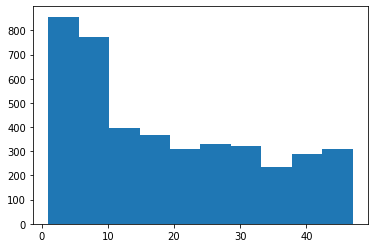

In [30]:
plt.hist(customer_join['membership_period'])

### 회원 기간 분포
- hist()를 이용해 히스토그램을 작성합니다.
- 결과를 보면, 회원 기간이 10개월 이내인 고객이 많고, 10개월 이상의 고객수는 거의 일정한 것을 알 수 있습니다.
- 이것은 짧은 기간에 고객이 빠져나가는 업계라는 것을 시사합니다.

# **030/ 탈퇴 회원과 지속 회원의 차이를 파악하자**

### 지금 까지는 전체적인 숫자를 파악했습니다.
- 마지막으로 탈퇴 회원의 특징을 찾아봅시다.
- 지금 까지의 테크닉을 활용해서 탈퇴 회원과 지속 회원으로 나눠서 비교해 봅시다.
- 테크닉 23에서 집계한 탈퇴 회원과 지속 회원의 수는 탈퇴 회원은 1,350명이고, 지속 회원은 2,840명입니다.
- 탈퇴 회원과 지속 회원을 나눠서 describe로 비교해 봅시다.

In [32]:
customer_end = customer_join.loc[customer_join['is_deleted'] == 1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [33]:
customer_stay = customer_join.loc[customer_join['is_deleted'] == 0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


### 통계량 집계 결과
- 결과를 보면, 탈퇴 회원의 매월 이용 횟수의 평균값, 중앙값, 최댓값, 최솟값은 모두 지속 회원보다 작습니다.
- 특히, 평균값과 중앙값은 1.5배 정도 차이가 나는 것을 알 수 있습니다.
- 반면에 매월 최대 이용 횟수의 평균값은 지속 회원이 높기는 하지만, 탈퇴 회원도 6.4정도입니다.
- routine_flg의 평균은 차이가 크게 나서 지속 회원은 0.98로 많은 회원이 정기적으로 이용하고 있다는 것을 알수 있지만, 탈퇴 회원은 0.45로 거의 절반은 랜덤하게 이용하고 있다고 생각할 수 있습니다.

- 이렇게 행동 데이터를 풀어가면 탈퇴 회원과의 차이를 확인할 수 있으며, 기간을 줄이거나 회원의 재적 기간별로 조사해 나가면 좀 더 많은 것이 보일 것으로 생각됩니다.